In [63]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importer mon dataset Clean

In [64]:
os.chdir('/home/utilisateur/projet/Assurance/Assurance_FE/')
print(os.listdir())
dataset_path = "Clean_Dataset_Brief.csv"
df_clean = pd.read_csv(dataset_path)

['NoteBook_Modelisation.ipynb', 'Clean_Dataset_Brief.csv', 'testmodel.ipynb', 'NoteBook_Netoyage.ipynb', '.git', 'Guide.txt', 'note.txt', 'Dataset_Brief.csv', 'README.md', 'requirements.txt', 'NoteBook_Analyse.ipynb', '.gitignore']


Defini la target Y.

Drop la target du Dataset.

In [65]:
y_target = df_clean['charges']

df_clean_without_charges = df_clean.drop('charges', axis=1)

Analyse univariée de chaque variable dans mon dataset et afficher les %.

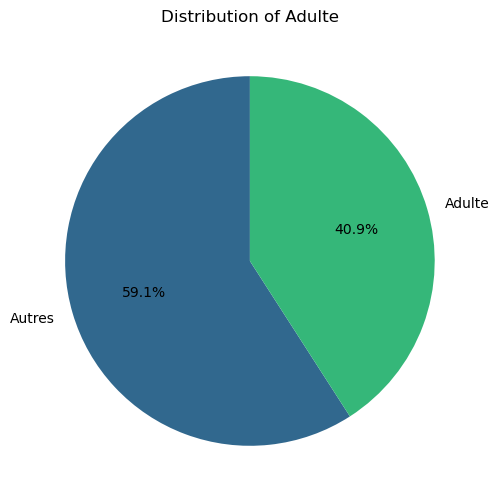

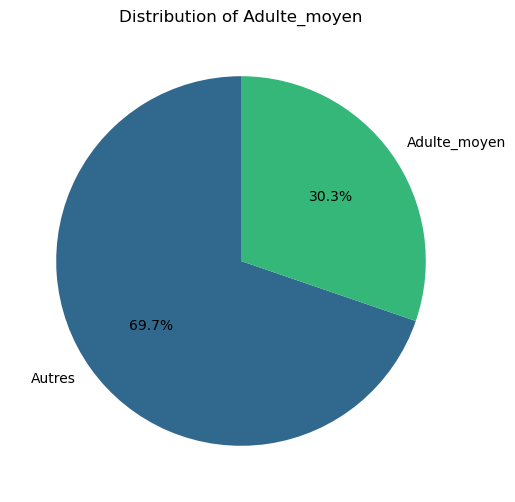

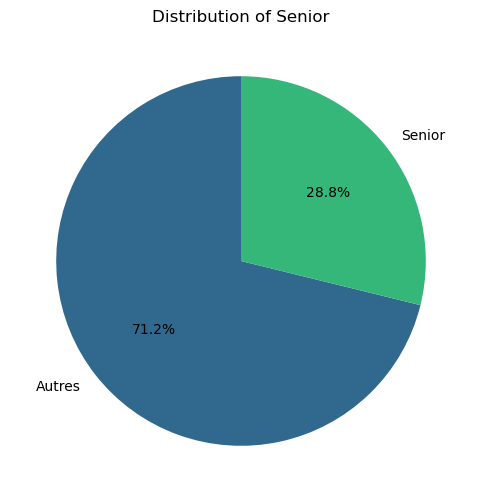

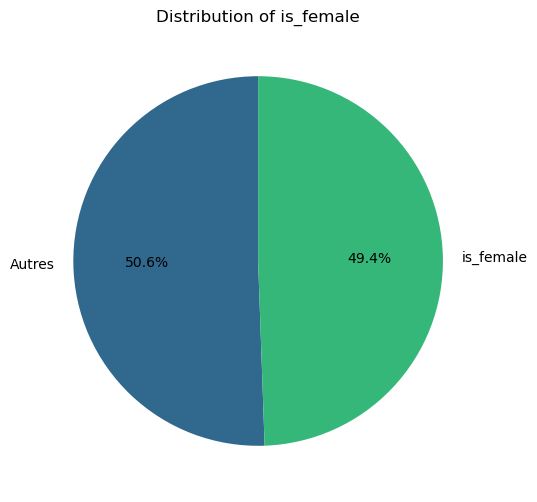

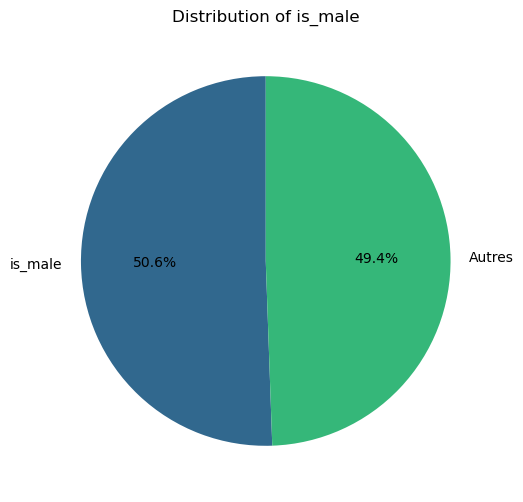

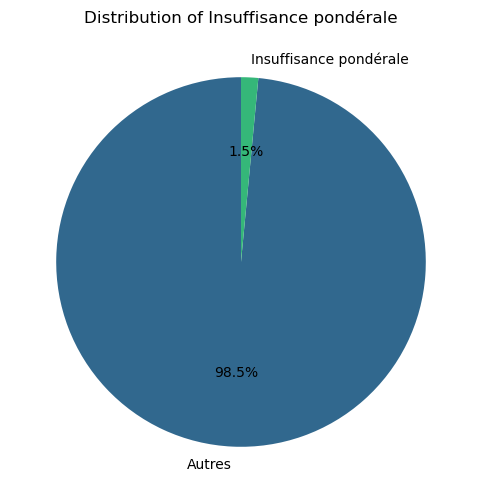

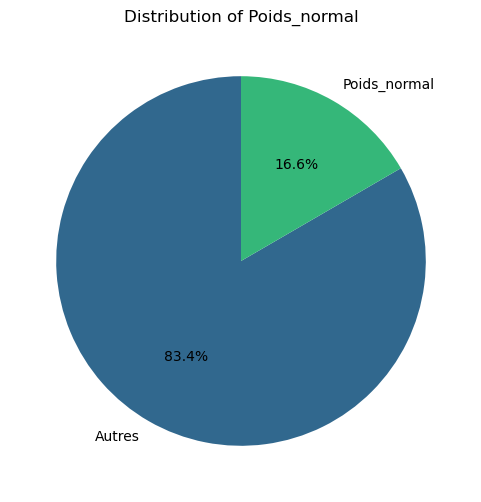

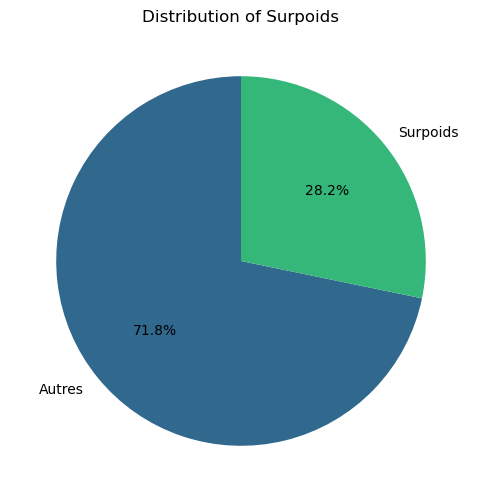

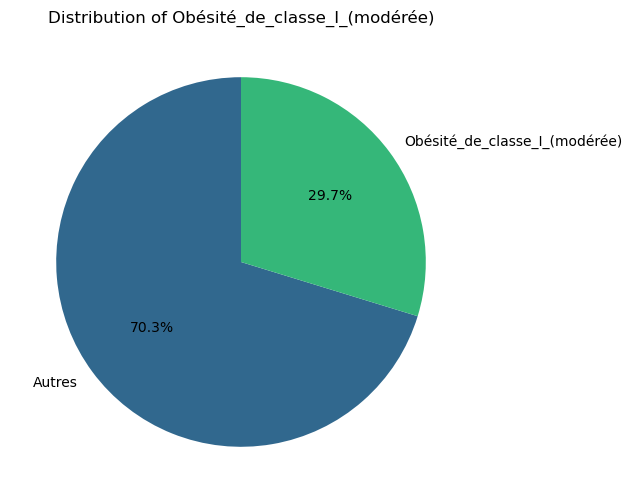

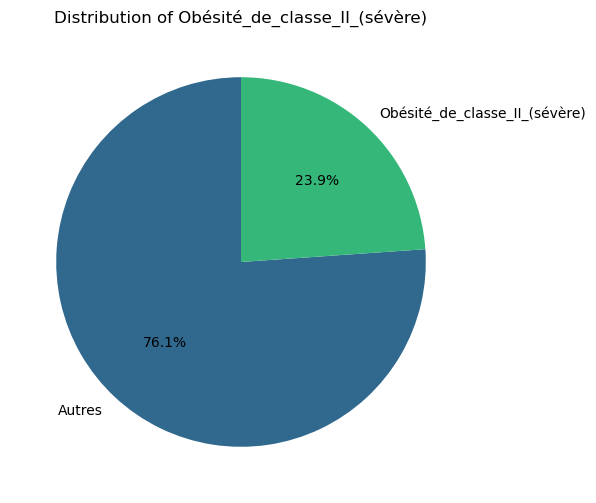

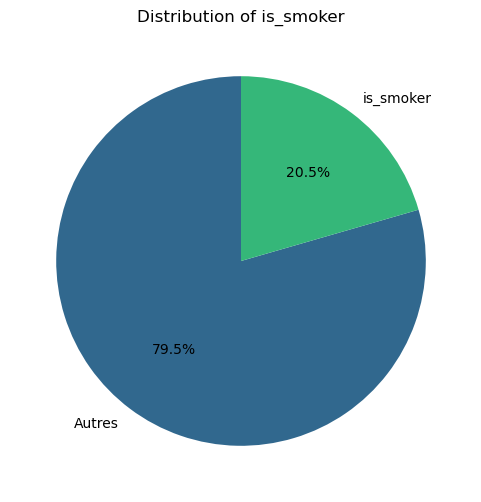

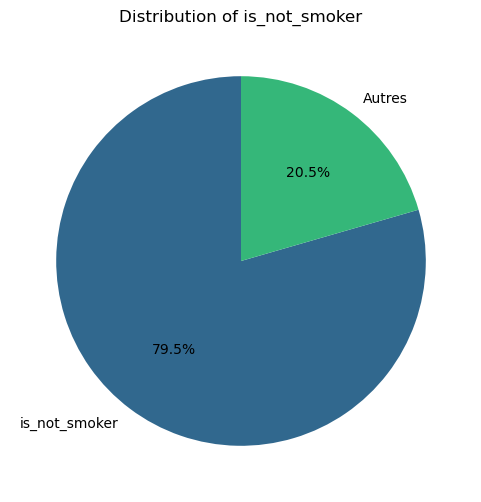

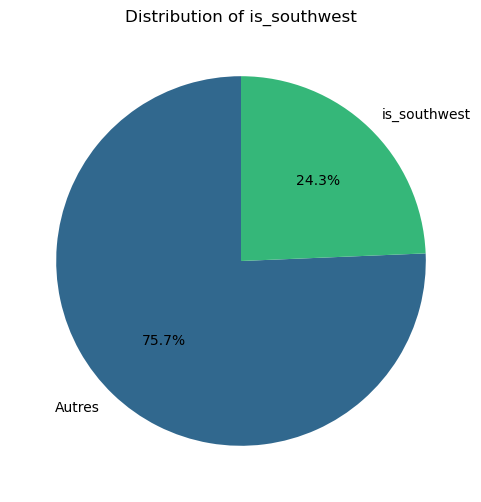

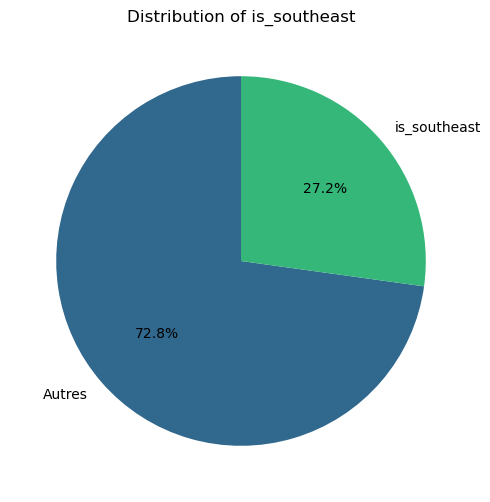

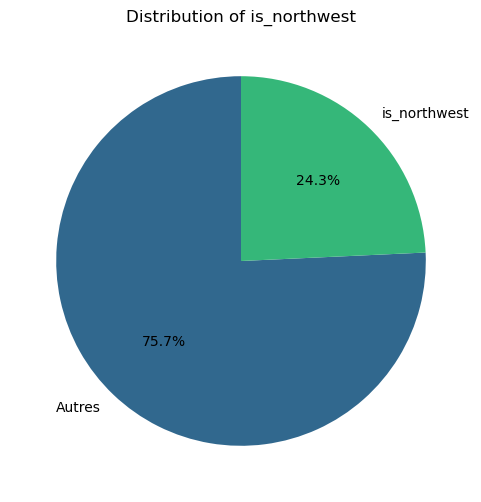

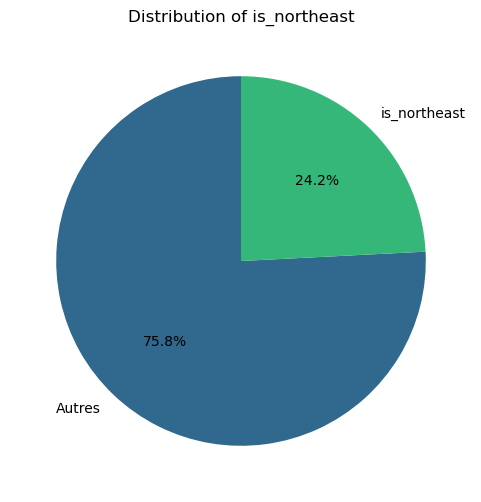

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot pie charts for binary categorical variables
binary_columns = df_clean_without_charges.select_dtypes(include=['int64']).columns
for col in binary_columns:
    unique_values = df_clean[col].unique()

    if len(unique_values) == 2:  # Check if it's a binary column
        plt.figure(figsize=(6, 6))

        # Calculate percentage distribution
        distribution = df_clean[col].value_counts(normalize=True) * 100

        # Check if count is greater than 0 before plotting
        if distribution.sum() > 0:
            # Replace the label of the value 1 with the column name and 0 with 'Autres'
            distribution.index = [col if idx == 1 else 'Autres' for idx in distribution.index]

            # Plot pie chart with percentage labels
            plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(distribution)))

            plt.title(f'Distribution of {col}')
            plt.show()


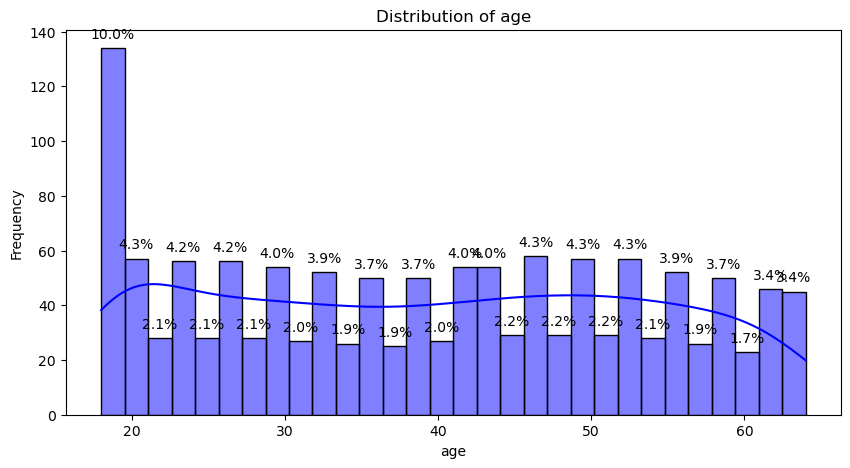

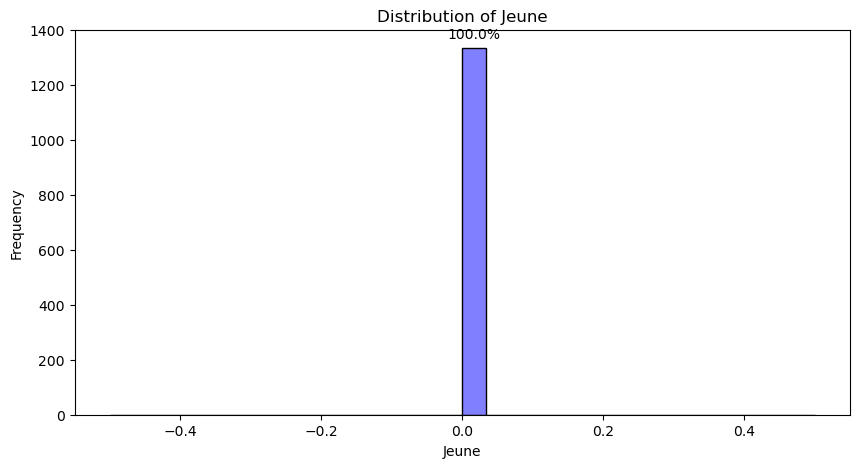

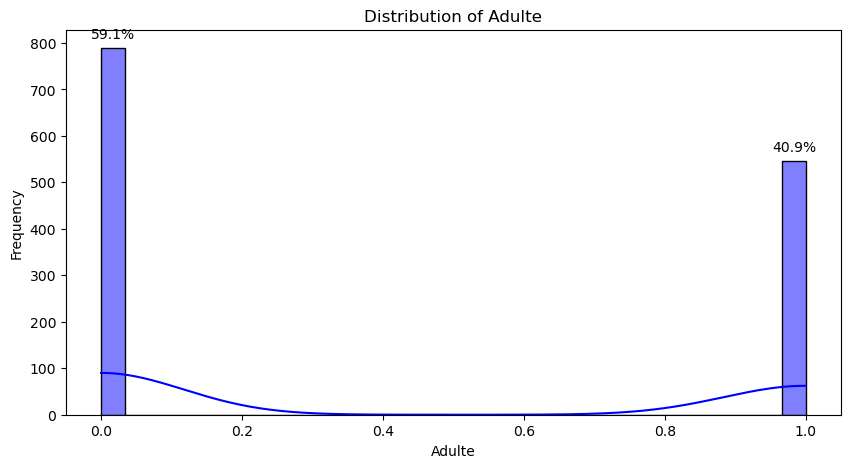

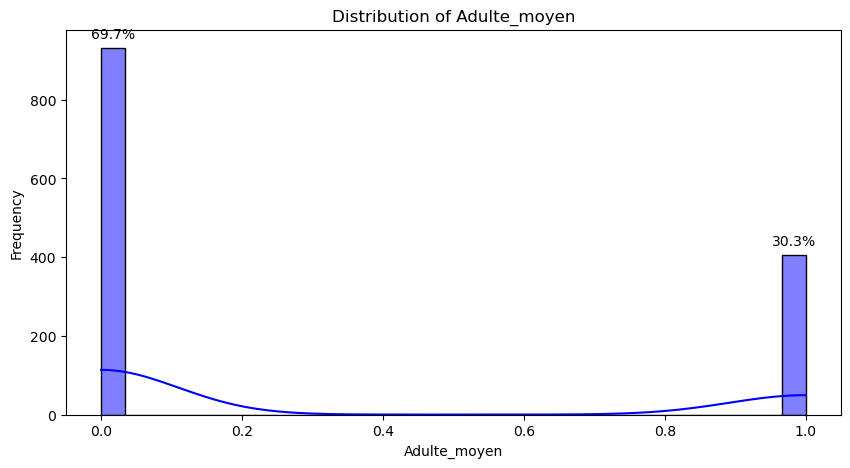

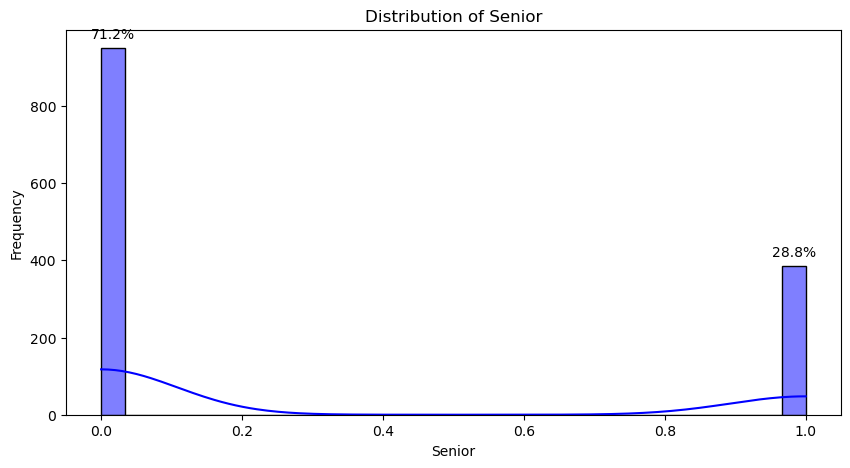

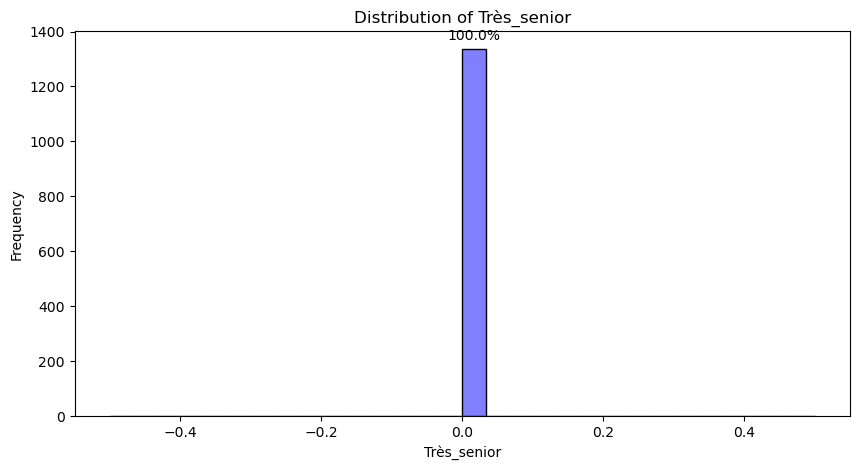

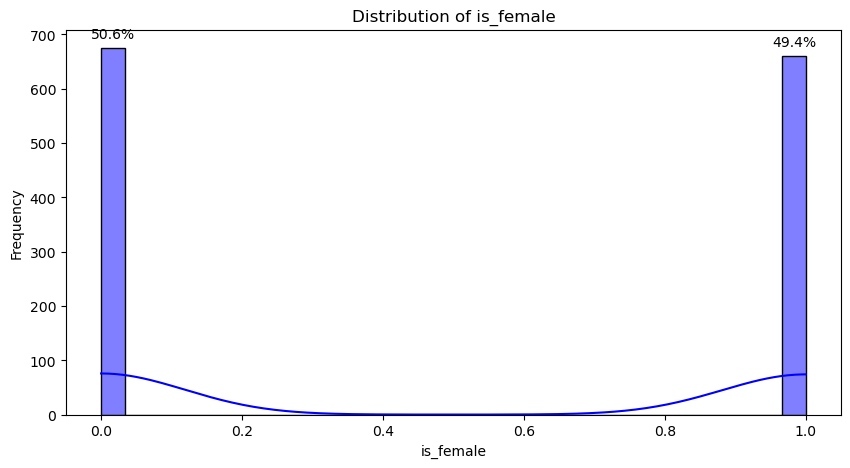

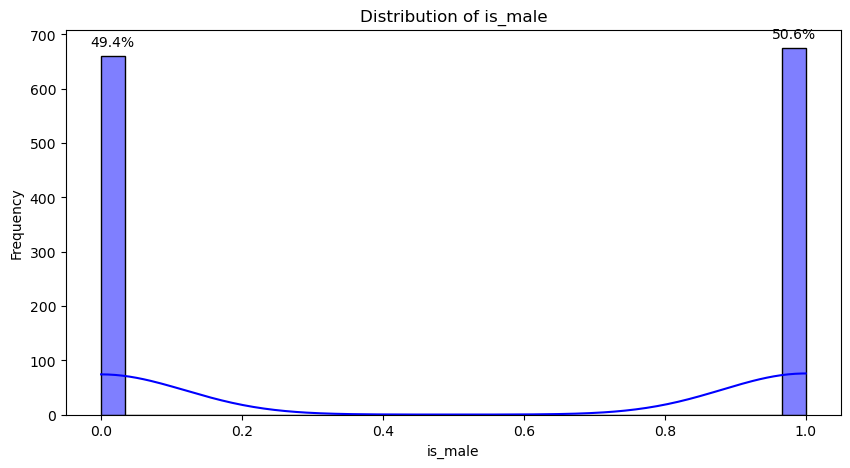

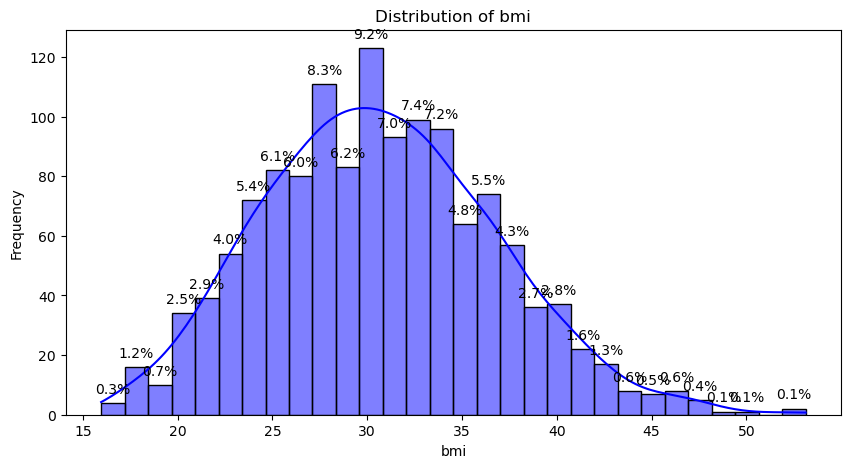

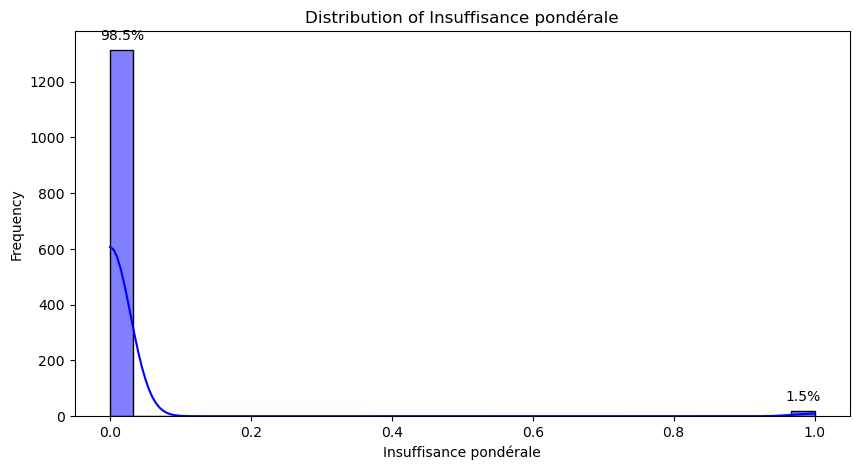

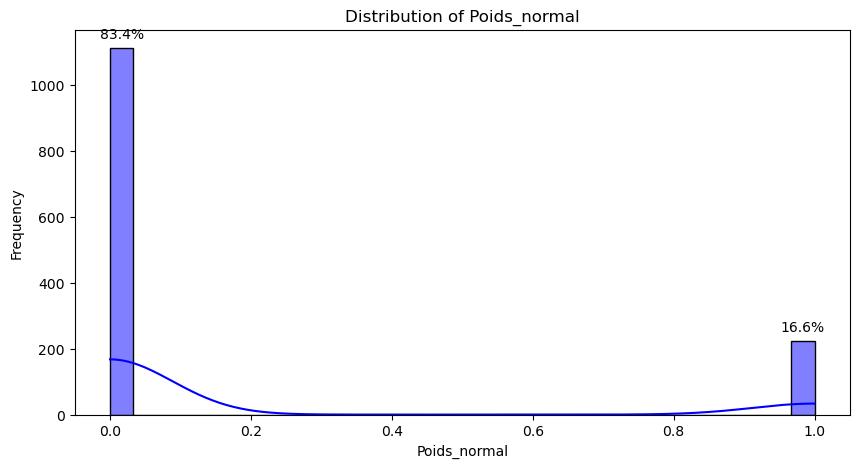

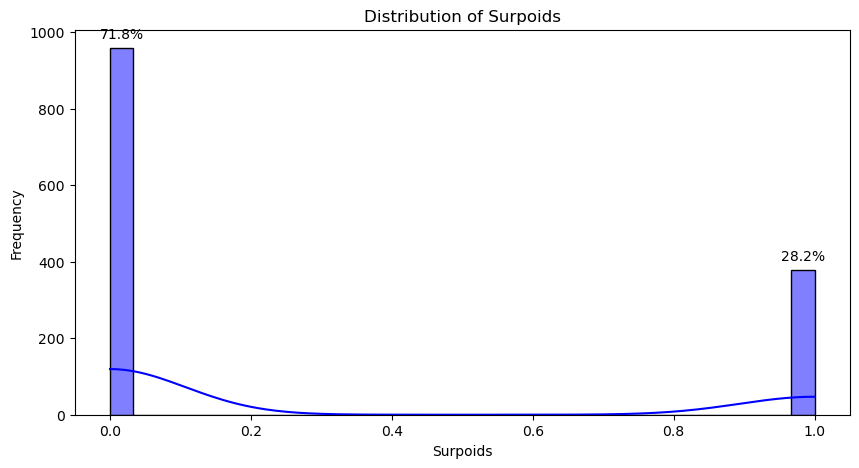

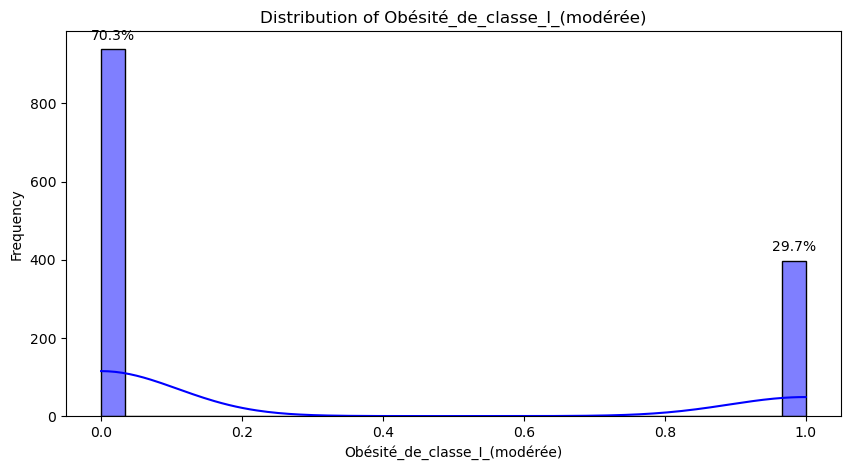

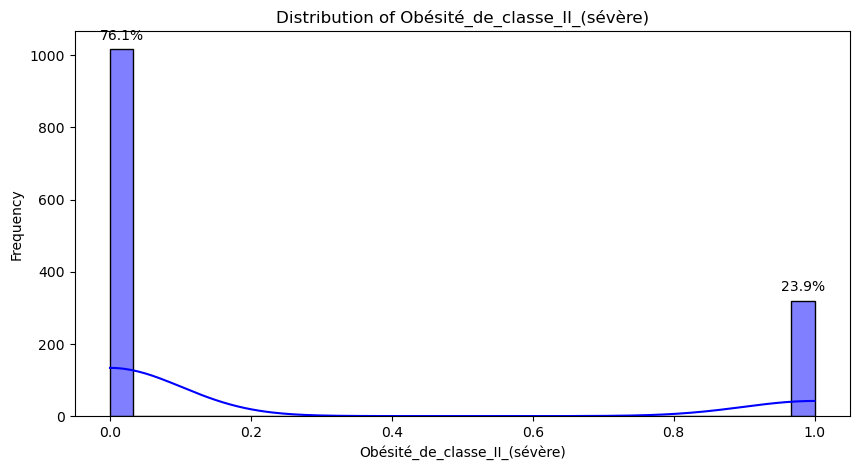

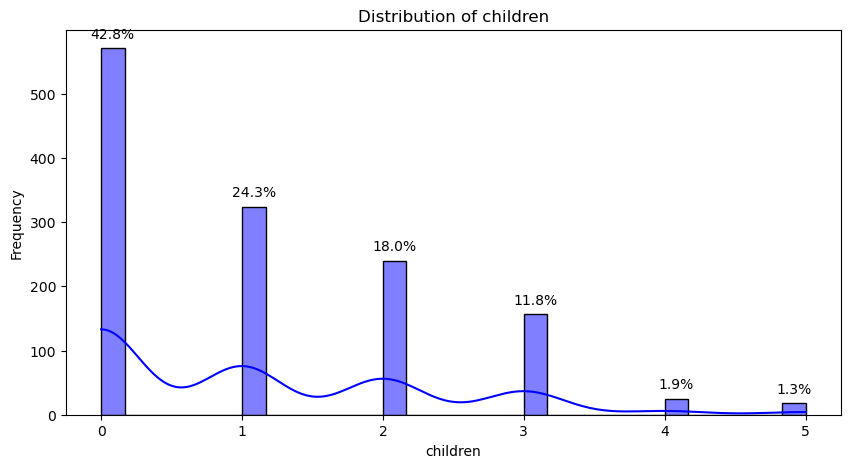

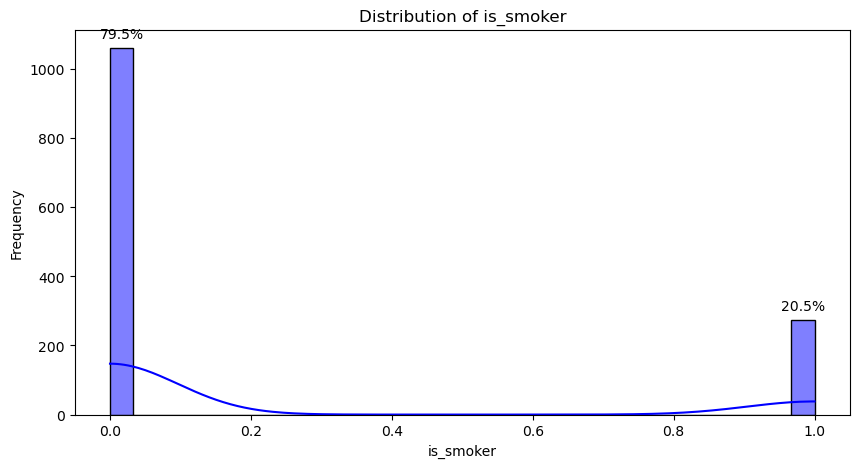

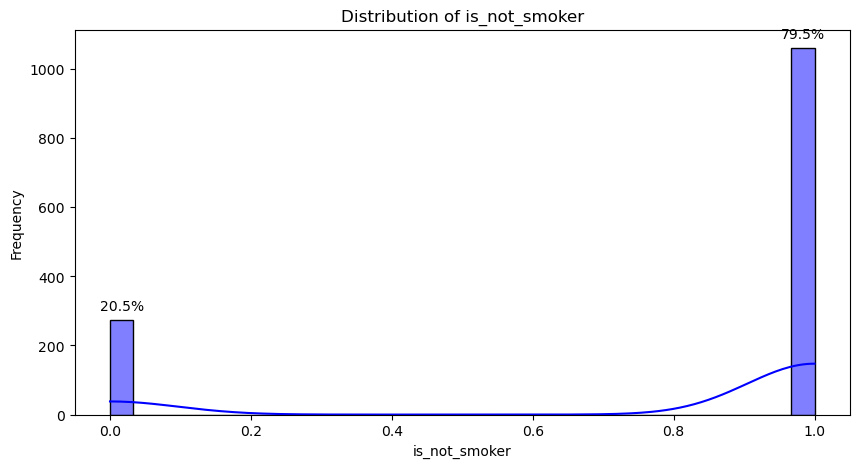

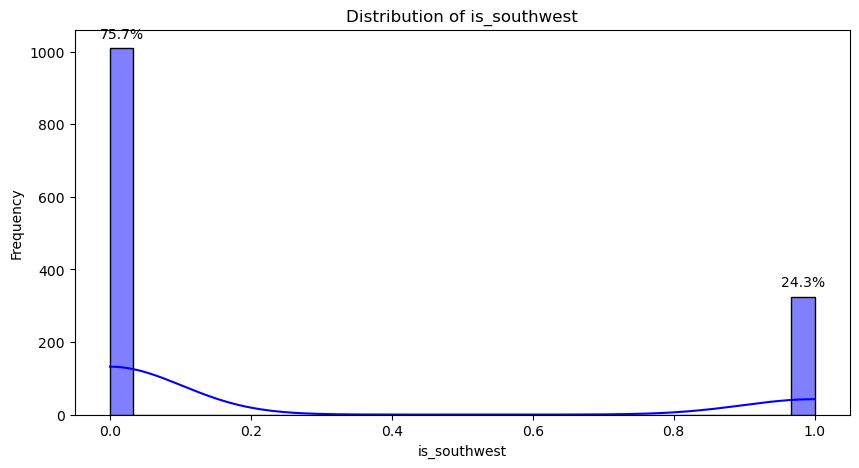

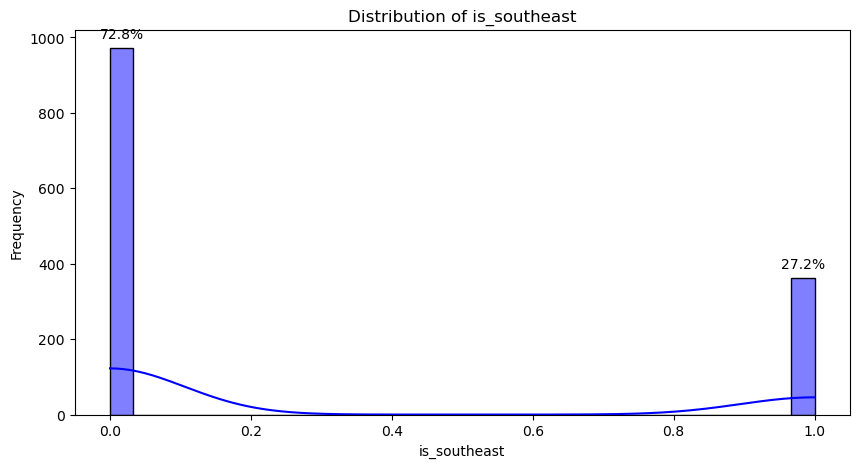

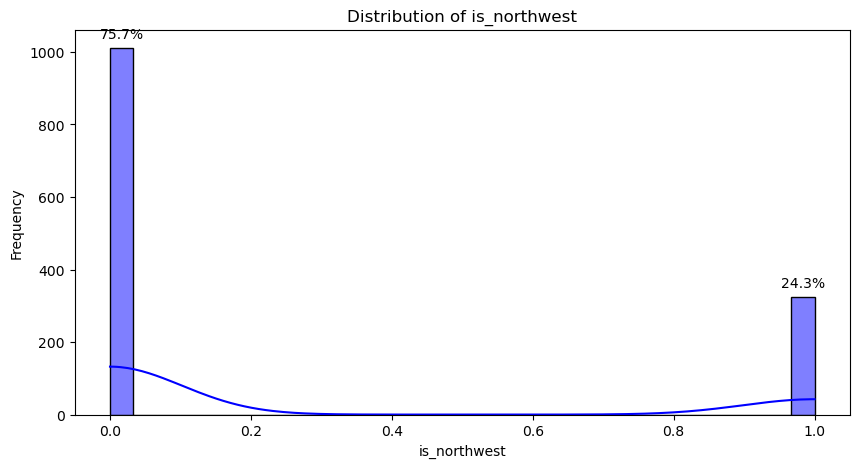

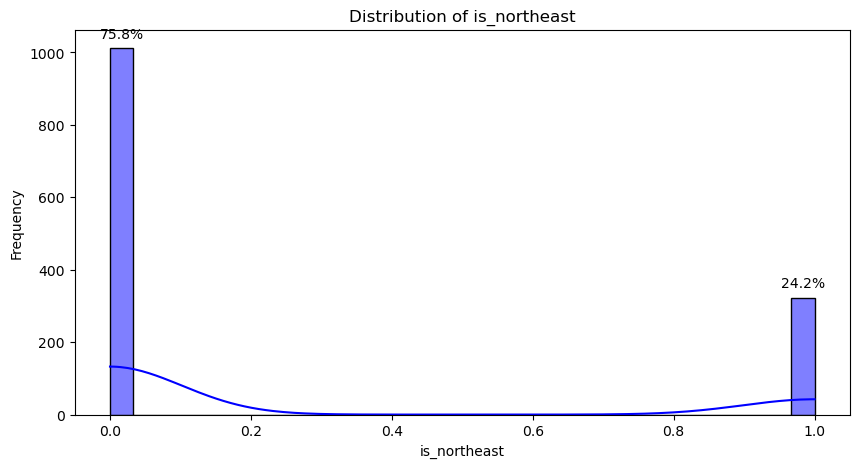

In [68]:
# Plot histograms for numerical variables
numeric_columns = df_clean_without_charges.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_clean[col], kde=True, bins=30, color='blue')
    
    # Annotate percentage on the histogram bars
    total_count = len(df_clean[col])
    for patch in plt.gca().patches:
        height = patch.get_height()
        percentage = (height / total_count) * 100
        
        # Check if count is greater than 0 before annotating
        if height > 0:
            plt.gca().annotate(f'{percentage:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Étudier la corrélation des variables avec la variable cible.

                          Feature  Correlation  Absolute_Correlation
21                        charges     1.000000              1.000000
15                      is_smoker     0.787313              0.787313
16                  is_not_smoker    -0.787313              0.787313
0                             age     0.297956              0.297956
2                          Adulte    -0.246809              0.246809
4                          Senior     0.242622              0.242622
8                             bmi     0.198453              0.198453
13  Obésité_de_classe_II_(sévère)     0.178360              0.178360
11                       Surpoids    -0.116877              0.116877
10                   Poids_normal    -0.107209              0.107209
18                   is_southeast     0.073180              0.073180
14                       children     0.066877              0.066877
6                       is_female    -0.057468              0.057468
7                         is_male 

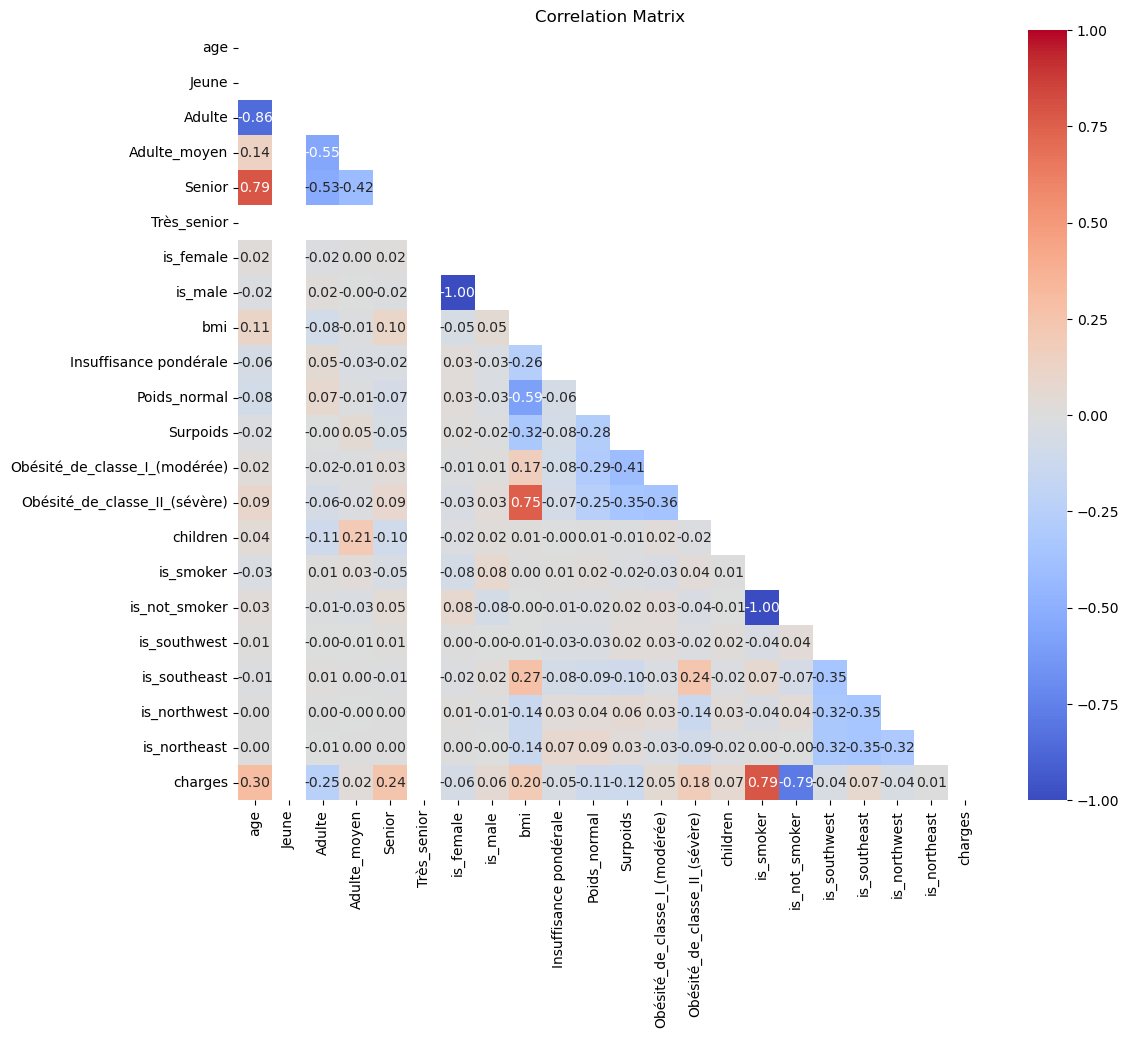

In [ ]:
# Initialize an empty dictionary to store correlations
correlation_dict = {}

# Iterate through each column in df_clean
for col in df_clean.columns:
    # Calculate the correlation with y_target
    correlation = df_clean[col].corr(y_target)
    
    # Store the correlation in the dictionary
    correlation_dict[col] = correlation

# Convert the dictionary to a DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlation'])

# Display the DataFrame sorted by absolute correlation values
correlation_df['Absolute_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Absolute_Correlation', ascending=False)

# Print the DataFrame
print(correlation_df)

# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


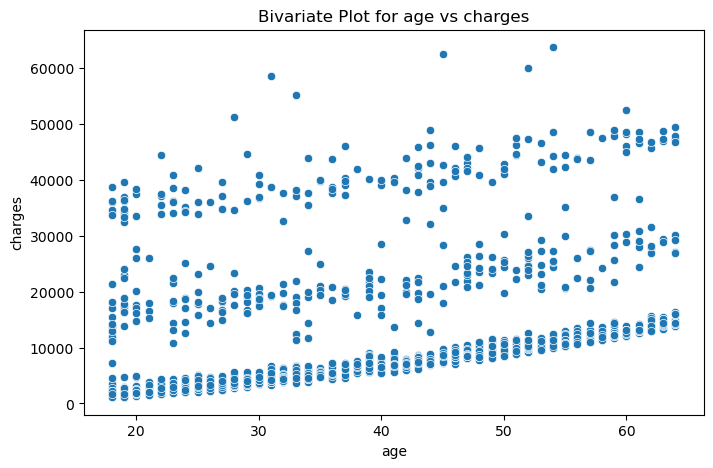

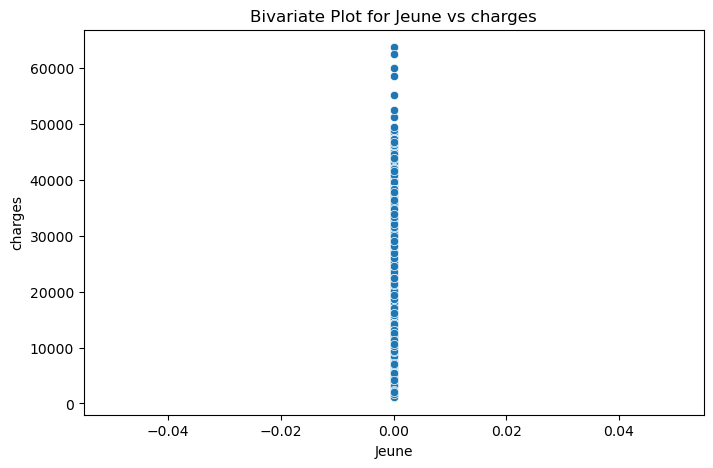

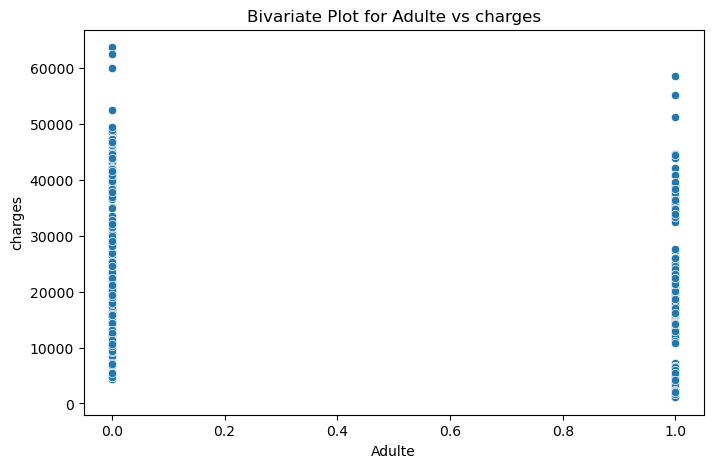

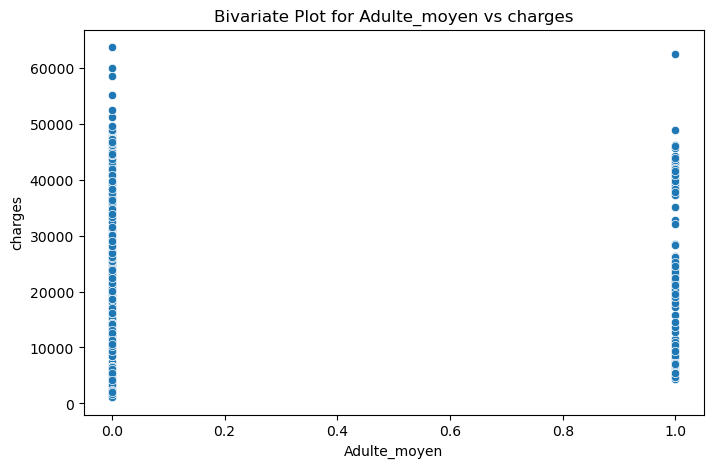

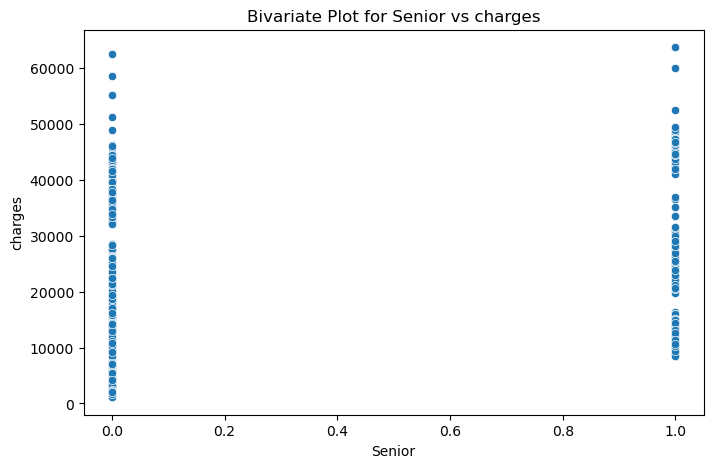

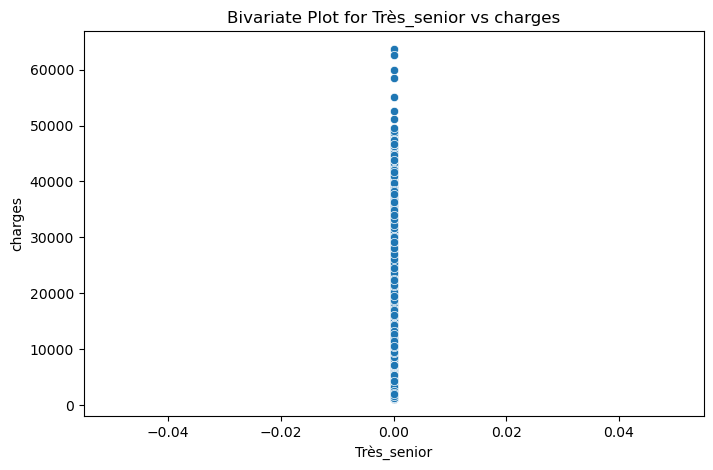

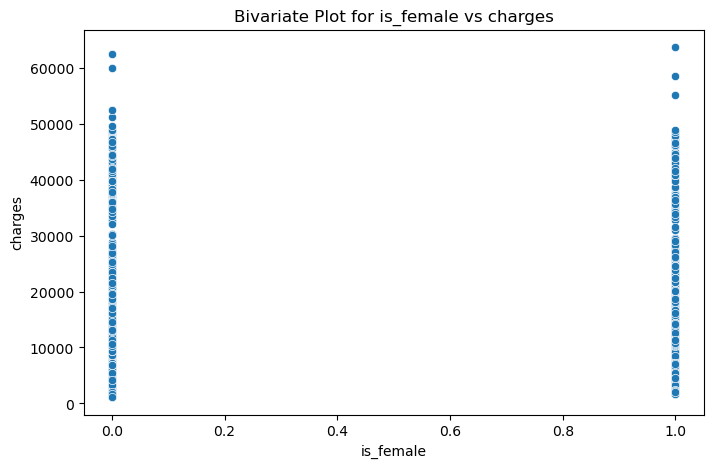

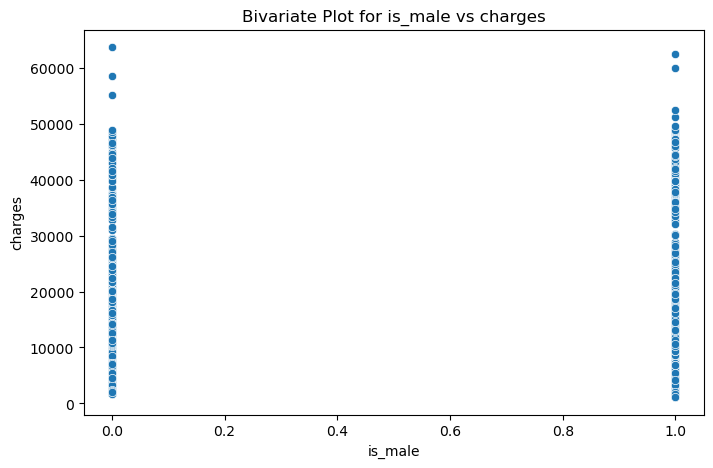

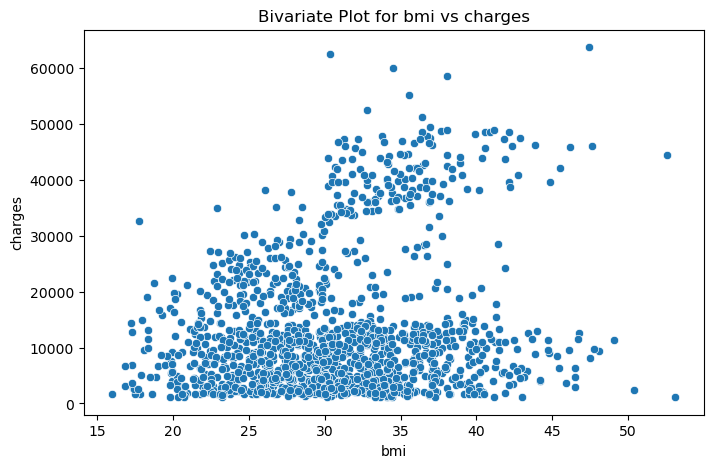

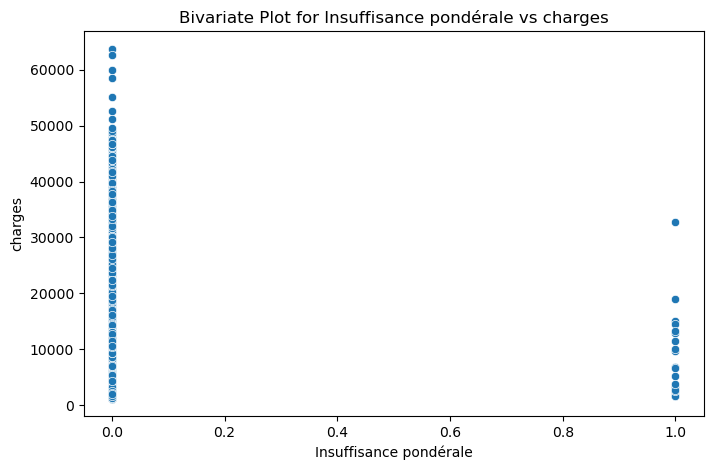

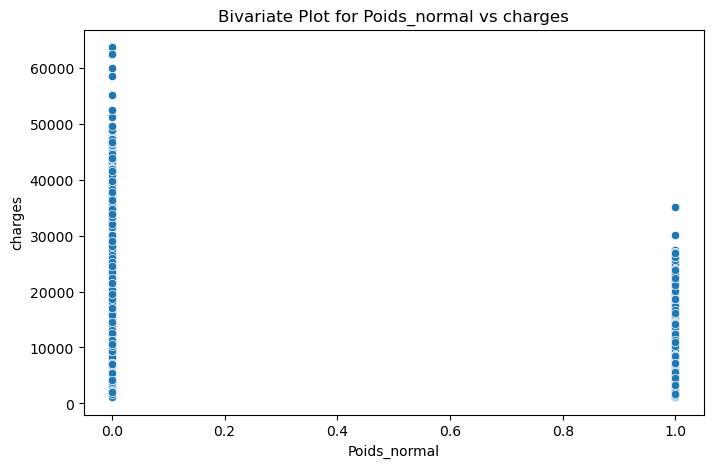

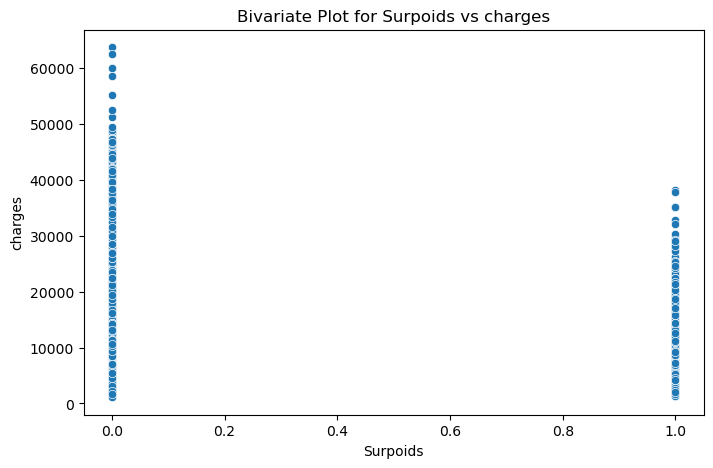

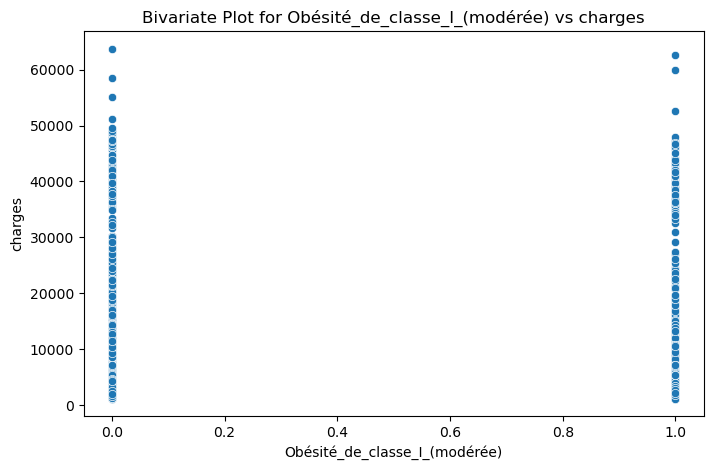

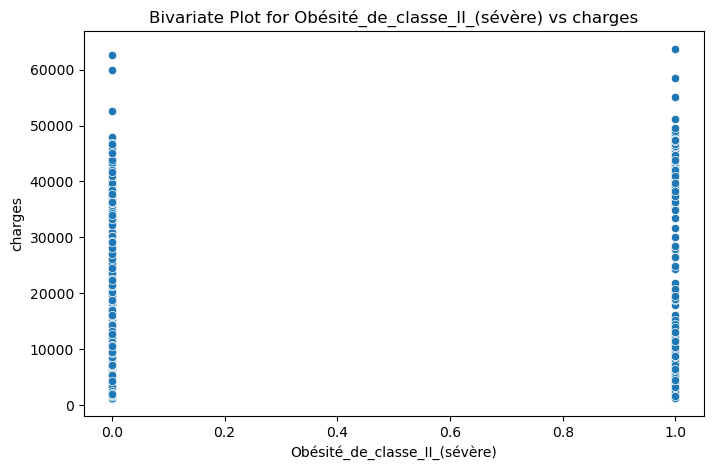

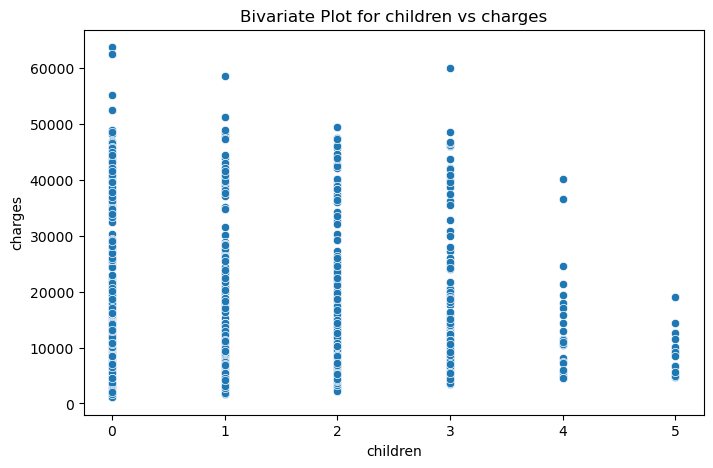

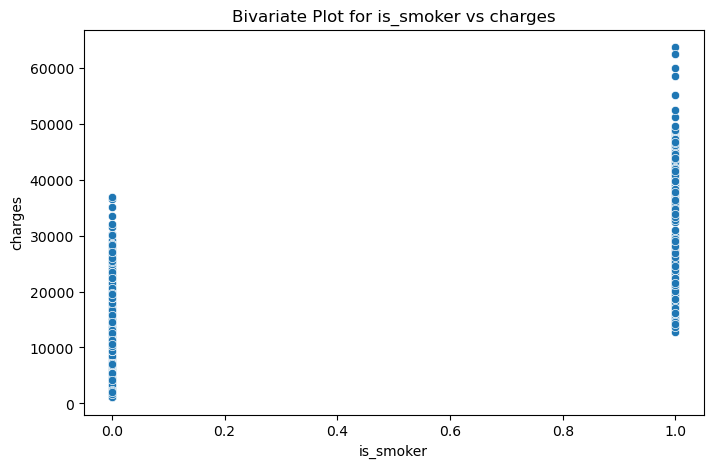

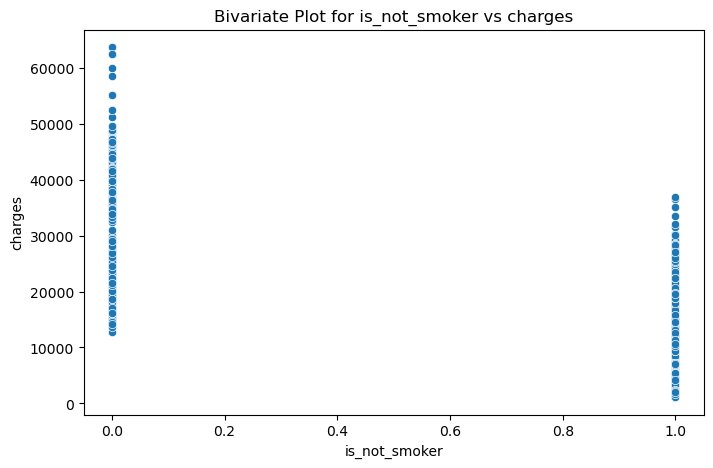

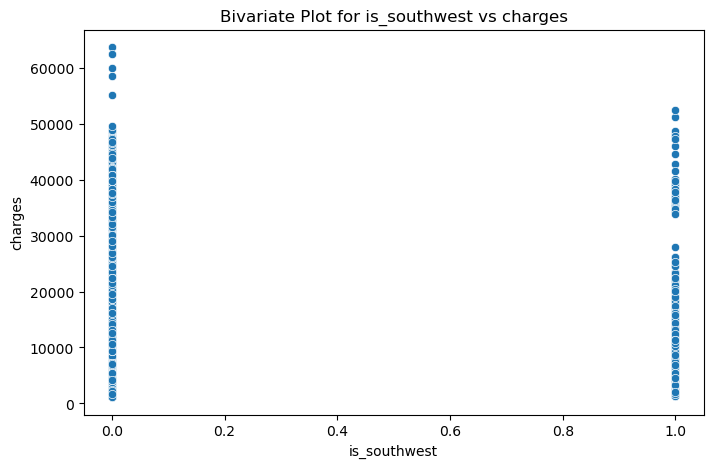

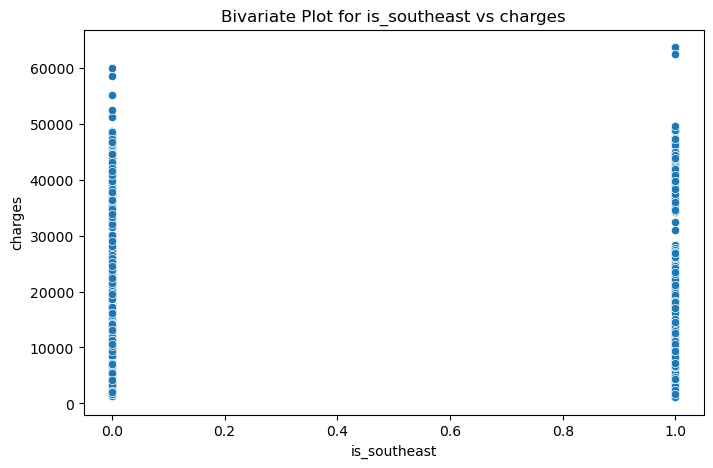

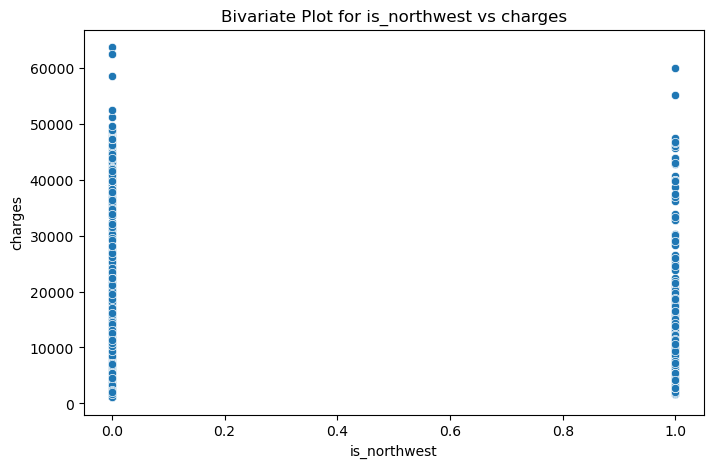

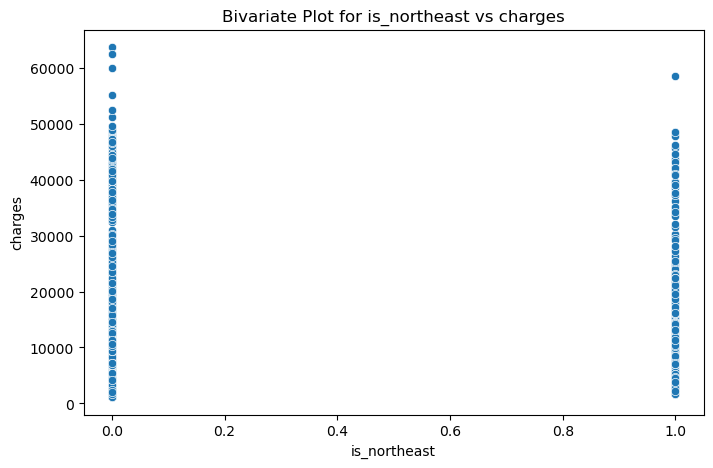

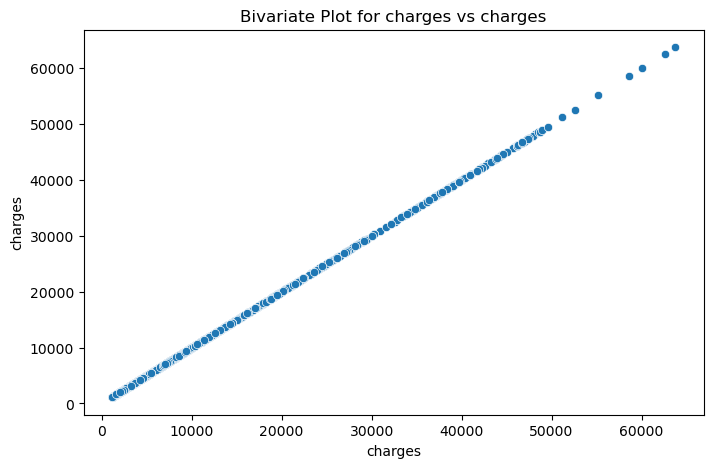

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bivariate(df, target, numeric_columns=None, categorical_columns=None):
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object']).columns

    for col in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=col, y=target, data=df)
        plt.title(f'Bivariate Plot for {col} vs {target.name}')
        plt.xlabel(col)
        plt.ylabel(target.name)
        plt.show()

    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=col, y=target, data=df)
        plt.title(f'Bivariate Plot for {col} vs {target.name}')
        plt.xlabel(col)
        plt.ylabel(target.name)
        plt.show()

# Assuming y_target is defined
y_target = df_clean['charges']

# Call the function
plot_bivariate(df_clean, y_target)